In [1]:
from project_code.label_loader import *
from project_code.image_loader import *
from project_code.util import *
from project_code.models import *
from project_code.model_trainer import *
from project_code.dataset import *

In [2]:
file_name_1 = '/Users/fahimtajwar/Academics/cs231/labels_cells_only.xlsx'
file_name_2 = '/Users/fahimtajwar/Academics/cs231/classes_800.xlsx'
file_names = [file_name_1, file_name_2]

label_reader = Label_Reader(file_names)
weight_vector = label_reader.get_weight_vector()
print(label_reader.get_all_labels())
print(label_reader.get_label_to_label_id_map())
print(weight_vector)

{'grows sparse', 'cell dies', 'grows dense'}
{'grows sparse': 0, 'cell dies': 1, 'grows dense': 2}
tensor([0.0097, 0.0260, 0.0294])


In [3]:
prefix = "/Users/fahimtajwar/Academics/cs231/project_data_well_2/well2_data/well"
suffix = "_well.png"

all_well_ids = label_reader.get_all_well_ids()
si = Single_Image_Loader(5, all_well_ids, prefix, suffix)
tensor = si.get_image_tensor()
well_id_to_image_id_map = si.get_well_to_image_id_map()
print(tensor.shape)
print(well_id_to_image_id_map)

torch.Size([351, 3, 224, 224])
{1004: 0, 1006: 1, 1015: 2, 1016: 3, 1018: 4, 1019: 5, 1023: 6, 1027: 7, 1036: 8, 1037: 9, 1046: 10, 1055: 11, 1060: 12, 1062: 13, 1063: 14, 1064: 15, 1078: 16, 1086: 17, 1091: 18, 1098: 19, 1100: 20, 1111: 21, 1122: 22, 1125: 23, 1130: 24, 1134: 25, 1141: 26, 1142: 27, 1146: 28, 1153: 29, 1171: 30, 1175: 31, 1176: 32, 1187: 33, 1194: 34, 1233: 35, 1242: 36, 1254: 37, 1265: 38, 1303: 39, 1324: 40, 1327: 41, 1337: 42, 1389: 43, 1416: 44, 1432: 45, 1457: 46, 1460: 47, 1476: 48, 1480: 49, 1516: 50, 1520: 51, 1524: 52, 1569: 53, 1591: 54, 1600: 55, 1607: 56, 1608: 57, 1611: 58, 1614: 59, 1622: 60, 1644: 61, 1646: 62, 1667: 63, 1672: 64, 1679: 65, 1685: 66, 1689: 67, 1693: 68, 1714: 69, 1719: 70, 1733: 71, 1736: 72, 1739: 73, 1754: 74, 1770: 75, 1771: 76, 1772: 77, 1775: 78, 1779: 79, 1784: 80, 1785: 81, 1786: 82, 1791: 83, 1794: 84, 1801: 85, 1804: 86, 1806: 87, 1807: 88, 1811: 89, 1812: 90, 1813: 91, 1815: 92, 1819: 93, 1824: 94, 1825: 95, 1828: 96, 1829: 97

In [4]:
input_size = 3 * 224 * 224
num_classes = 3

label_to_label_id = label_reader.label_to_label_id
label_id_to_label_map = label_reader.get_label_id_to_label_map()
#print(label_id_to_label_map)

Y_label = label_reader.get_label_map()
for key in Y_label:
    Y_label[key] = label_to_label_id[Y_label[key]]

#print(Y_label)

label_id_train, label_id_val, label_id_test = get_dataset_split(Y_label)
print(len(label_id_train))
print(label_id_train)
print(len(label_id_val))
print(len(label_id_train))

280
[ 724 2124 2800  614 2017 1480 1824  383 1945  499  321 2249 2972 1646
 1591 1337 1432 2847  593 2684 1046 1775 1934   96 1125  325 2231 2832
 1187 1614 1098   17  418  347  167  250 2751  587  187 2541 1992  100
 1779 2543  136  128  723   67 1736 2579  101 2986  399  329   52 1733
  326  206  374 1829  197 1848 1771 1141 1679 1194   68 1130 2397 1786
 2164 1958 2046 1876 1062 2625 1879 2337 1142 1569  257 1242   54 1064
  391 1813 1770  424  753 2971 2991 2853 1977 1931  384 1838 2040 2082
 1870  159 1815 1833 2640  134  579  331 1794  292 2857 1016 1811 2094
 1967 1175  739 1693 1078  450  750 2122  242  121 1524 1176 2210 1812
 2634  767 1918 2344  561 2920 1004  371  525  738  455 2091  221 1900
 1644  559 1831 1806 1893 1801 1791  255 2114 1906 2389 1983  202 2387
  590  381 1134 1667  703  517 2193 2215 2414 1303 1857 2955 1153 2942
  608 2031 1940 1853 2299  278 1036  548 2578  183  542 1111 1754 1772
  785 2134 2032 1947 1719 1324   75 1714 1962 2569 1835  695 1254 2417
  

In [5]:
training_set = Augmented_Dataset(tensor, label_id_train, Y_label, well_id_to_image_id_map, final_transformation_choice)
validation_set = Augmented_Dataset(tensor, label_id_val, Y_label, well_id_to_image_id_map, transform_normalization)
test_set = Augmented_Dataset(tensor, label_id_test, Y_label, well_id_to_image_id_map, transform_normalization)

In [6]:
training_batch_size = 320
validation_batch_size = 1
test_batch_size = 1
learning_rate = 0.0001

validation_loader = torch.utils.data.DataLoader(dataset = validation_set, 
                                          batch_size = validation_batch_size, 
                                          shuffle = False)
test_loader = torch.utils.data.DataLoader(dataset = test_set, 
                                          batch_size = test_batch_size, 
                                          shuffle = False)

In [7]:
logistic_model = LogisticRegression(input_size, num_classes)

In [8]:
model = Model(logistic_model, training_set, training_batch_size, learning_rate, label_id_to_label_map, 
              weight = weight_vector, imbalanced_class = True, num_epochs = 30, verbose = True)

Epoch: [1/30], Loss: 1.1632
Epoch: [2/30], Loss: 1.1571
Epoch: [3/30], Loss: 1.1226
Epoch: [4/30], Loss: 1.1357
Epoch: [5/30], Loss: 1.0827
Epoch: [6/30], Loss: 1.0772
Epoch: [7/30], Loss: 1.0610
Epoch: [8/30], Loss: 1.0590
Epoch: [9/30], Loss: 1.0537
Epoch: [10/30], Loss: 1.0182
Epoch: [11/30], Loss: 1.0534
Epoch: [12/30], Loss: 1.0204
Epoch: [13/30], Loss: 1.0410
Epoch: [14/30], Loss: 1.0357
Epoch: [15/30], Loss: 1.0299
Epoch: [16/30], Loss: 1.0224
Epoch: [17/30], Loss: 1.0259
Epoch: [18/30], Loss: 1.0037
Epoch: [19/30], Loss: 0.9884
Epoch: [20/30], Loss: 1.0069
Epoch: [21/30], Loss: 1.0115
Epoch: [22/30], Loss: 1.0100
Epoch: [23/30], Loss: 1.0046
Epoch: [24/30], Loss: 0.9978
Epoch: [25/30], Loss: 0.9997
Epoch: [26/30], Loss: 1.0010
Epoch: [27/30], Loss: 0.9694
Epoch: [28/30], Loss: 1.0015
Epoch: [29/30], Loss: 0.9872
Epoch: [30/30], Loss: 0.9787
Training done!


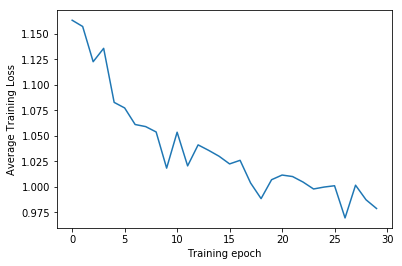

accuracy : 47.000000

Frequency per class:  {'grows dense': 60, 'grows sparse': 161, 'cell dies': 59}


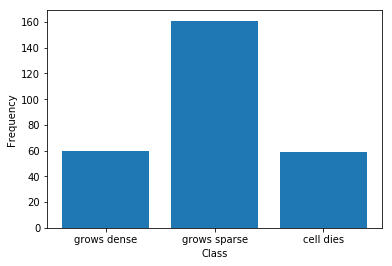

Number of datapoints we got correct per class {'grows dense': 40, 'grows sparse': 64, 'cell dies': 30}
Accuracy per class {'grows dense': 0.6666666666666666, 'grows sparse': 0.39751552795031053, 'cell dies': 0.5084745762711864}


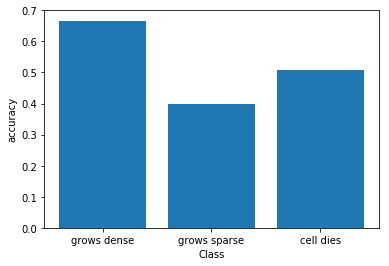

0.13475102642383407

In [9]:
model.train()

accuracy : 45.000000

Frequency per class:  {'grows sparse': 22, 'cell dies': 9, 'grows dense': 4}


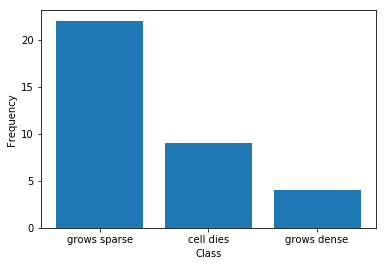

Number of datapoints we got correct per class {'grows sparse': 14, 'cell dies': 1, 'grows dense': 1}
Accuracy per class {'grows sparse': 0.6363636363636364, 'cell dies': 0.1111111111111111, 'grows dense': 0.25}


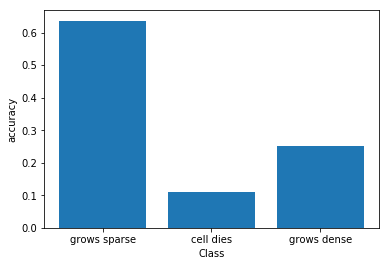

0.017676767676767676

In [10]:
model.test(validation_loader)

accuracy : 31.000000

Frequency per class:  {'grows sparse': 22, 'cell dies': 9, 'grows dense': 4}


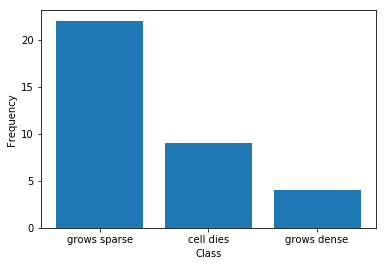

Number of datapoints we got correct per class {'grows sparse': 7, 'cell dies': 4, 'grows dense': 0}
Accuracy per class {'grows sparse': 0.3181818181818182, 'cell dies': 0.4444444444444444, 'grows dense': 0.0}


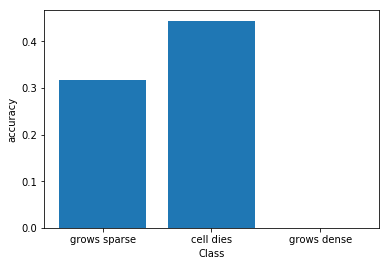

0.0

In [11]:
model.test(test_loader)

Training done!
Training done!
Training done!
Training done!
Training done!
accuracy : 14.000000

Frequency per class:  {'grows sparse': 22, 'cell dies': 9, 'grows dense': 4}


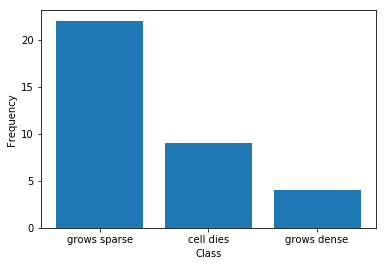

Number of datapoints we got correct per class {'grows sparse': 4, 'cell dies': 0, 'grows dense': 1}
Accuracy per class {'grows sparse': 0.18181818181818182, 'cell dies': 0.0, 'grows dense': 0.25}


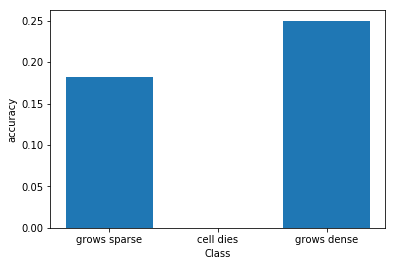

0.0

In [12]:
learning_rates = [0.0001, 0.0003, 0.001, 0.003, 0.01]
validater = Hyperparameter_Tuner(logistic_model, training_set, validation_loader, training_batch_size,
                                learning_rates, label_id_to_label_map, weight_vector, True)

best_model = validater.get_best_model()
best_model.test(test_loader)